# Assignment 1

Letter Image Recognition

In this assignment you are given a large number of black-and-white rectangular pixel displays. You will use neural networks (MLP) and KNN in order to predict which of the 26 capital letters in the English alphabet each such display represents.

### A: Source Information

Creator: David J. Slate Odesta Corporation; 1890 Maple Ave; Suite 115; Evanston, IL 60201  
Donor: David J. Slate (dave@math.nwu.edu) (708) 491-3867  
Date: January, 1991  


### B: Relevant Information

The character images is based on 20 different fonts and each letter within these 20 fonts has been randomly distorted to produce a file of 20,000 unique stimuli.  Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000 (**NOT in this assignment**). See the article cited below for more details: 

P. W. Frey and D. J. Slate (Machine Learning Vol 6 #2 March 91): "Letter Recognition Using Holland-style Adaptive Classifiers".

### C:Attribute Information

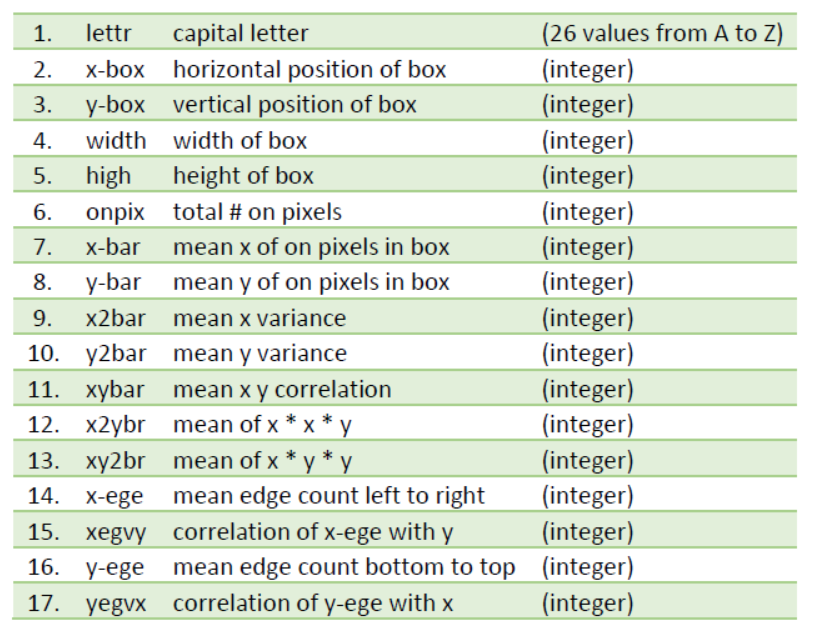

In [27]:
from IPython.display import Image
Image(filename='Att_Letter.png',width = "600",height = "300")

**Note**: In the above table, the class label is the **'lettr'** (No.1), following by the 16 numerical attributes (Nos. 2-17).

The following code uses Python's `csv` module to load the data and prints the first row and the total number of rows.

In [28]:
import sklearn
import csv

In [29]:
with open('Letter.csv') as f:
    reader = csv.reader(f)
    print("Header line: %s" % next(reader))
    annotated_data = [r for r in reader]
print(annotated_data[0])
print("Total number of rows:", len(annotated_data))

Header line: ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
['T', '2', '8', '3', '5', '1', '8', '13', '0', '6', '6', '10', '8', '0', '8', '0', '8']
Total number of rows: 20000


In [30]:
Header=['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

## Exercise 1 (1 mark) - Class Distribution
Compute and print the percentage and its number of stimuli corresponding to the five letters A-E (class label lettr).

* A: ?
* B: ?
* C: ?
* D: ?
* E: ?

In [31]:
#initialise variables
varA = varB = varC = varD = varE = 0

#loop through data and add 1 if letter occurs
for item in annotated_data:
    if item[0] == 'A':
        varA += 1
    if item[0] == 'B':
        varB += 1
    if item[0] == 'C':
        varC += 1
    if item[0] == 'D':
        varD += 1
    if item[0] == 'E':
        varE += 1
 
#print variable count and their %
print("A:",varA,",",round((varA/20000)*100,2),"%")
print("B:",varB,",",round((varB/20000)*100,2),"%")
print("C:",varC,",",round((varC/20000)*100,2),"%")
print("D:",varD,",",round((varD/20000)*100,2),"%")
print("E:",varE,",",round((varE/20000)*100,2),"%")
        


A: 789 , 3.94 %
B: 766 , 3.83 %
C: 736 , 3.68 %
D: 805 , 4.03 %
E: 768 , 3.84 %


## Exercise 2 (1 mark) - Split the data for training and testing purpose.
Split the data into a training set, a dev-test set, and a test set. Use the following ratio for splitting the data:

* Training set: 80%
* Dev-test set: 10%
* Test set: 10%

In [32]:
import random  
random.seed(1234)  
random.shuffle(annotated_data)  

The above three lines of code are used to randomize the order of the data.  
After that, you need to use the first 80% as training set, then 10% as Dev-test (this part will not be used from exercise 4), and the last 10% as test set.

In [33]:
import numpy
import sklearn.model_selection

#Following X and y naming convention 
X_allData = [] #input
y_allData = [] #letters


#Loop through annotated data, append letters to y and input to X 
for item in annotated_data:
    y_allData.append(ord(item[0]))
    varData = []
    for varInd in item[1:]:
        varData.append(int(varInd))
    X_allData.append(varData)

X_train = X_allData[:16000]
X_devTest = X_allData[16000:18000]
X_test = X_allData[18000:]

y_train = y_allData[:16000]
y_devTest = y_allData[16000:18000]
y_test = y_allData[18000:]



## Exercise 3 (1 mark) - Check that the data are balanced
Print the percentage of class label lettr (A-E) in each partition, and check that they are similar.

Training set:  

In [34]:
#Same structure as exercise 1 but reading the Unicode code and converting to letter
varA = varB = varC = varD = varE = 0

for item in y_train:
    if item == ord('A'):
        varA += 1
    if item == ord('B'):
        varB += 1
    if item == ord('C'):
        varC += 1
    if item == ord('D'):
        varD += 1
    if item == ord('E'):
        varE += 1
       
    
print("A's percentage is =",round((varA/len(y_train))*100,2),"%")
print("B's percentage is =",round((varB/len(y_train))*100,2),"%")
print("C's percentage is =",round((varC/len(y_train))*100,2),"%")
print("D's percentage is =",round((varD/len(y_train))*100,2),"%")
print("E's percentage is =",round((varE/len(y_train))*100,2),"%")



A's percentage is = 3.94 %
B's percentage is = 3.76 %
C's percentage is = 3.61 %
D's percentage is = 4.08 %
E's percentage is = 3.88 %


Dev-test set:

In [35]:
#Same as previous exercise but on the dev test set
varA = varB = varC = varD = varE = 0

for item in y_devTest:
    if item == ord('A'):
        varA += 1
    if item == ord('B'):
        varB += 1
    if item == ord('C'):
        varC += 1
    if item == ord('D'):
        varD += 1
    if item == ord('E'):
        varE += 1
       
    
print("A's percentage is =",round((varA/len(y_devTest))*100,2),"%")
print("B's percentage is =",round((varB/len(y_devTest))*100,2),"%")
print("C's percentage is =",round((varC/len(y_devTest))*100,2),"%")
print("D's percentage is =",round((varD/len(y_devTest))*100,2),"%")
print("E's percentage is =",round((varE/len(y_devTest))*100,2),"%")

A's percentage is = 3.75 %
B's percentage is = 4.5 %
C's percentage is = 3.8 %
D's percentage is = 3.45 %
E's percentage is = 4.2 %


Test set:

In [36]:
#same as previous but on test set
varA = varB = varC = varD = varE = 0

for item in y_test:
    if item == ord('A'):
        varA += 1
    if item == ord('B'):
        varB += 1
    if item == ord('C'):
        varC += 1
    if item == ord('D'):
        varD += 1
    if item == ord('E'):
        varE += 1
       
    
print("A's percentage is =",round((varA/len(y_test))*100,2),"%")
print("B's percentage is =",round((varB/len(y_test))*100,2),"%")
print("C's percentage is =",round((varC/len(y_test))*100,2),"%")
print("D's percentage is =",round((varD/len(y_test))*100,2),"%")
print("E's percentage is =",round((varE/len(y_test))*100,2),"%")    

A's percentage is = 4.2 %
B's percentage is = 3.75 %
C's percentage is = 4.15 %
D's percentage is = 4.2 %
E's percentage is = 3.15 %


## Exercise 4 (3 marks) - Training and Testing of Data using MLPClassifier
Train an `sklearn` MLPClassifier with default settings (random_state=0) using the training set, and report the accuracy on the training and test set respectively.

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

#set mlp to random_state=0 and then fit
mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train,y_train)

#use predict and metrics to check accuracy
y_train_predictAccuracy = mlp.predict(X_train)
print("Train Set Accuracy: ", round(metrics.accuracy_score(y_train, y_train_predictAccuracy)*100,2),"%")

y_test_predictAccuracy = mlp.predict(X_test)
print("Test Set Accuracy: ", round(metrics.accuracy_score(y_test, y_test_predictAccuracy)*100,2),"%")




Train Set Accuracy:  94.87 %
Test Set Accuracy:  91.15 %


C:\Users\Luke\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Exercise 5 (8 marks) - Scaling, Training and Testing of Data using MLPClassifier
Neural networks expect all input features to vary in a way, and ideally to have a mean of 0, and a variance of 1.
Please refer to the **Standardization** (https://en.wikipedia.org/wiki/Feature_scaling) for attribute scaling. 

### 5.1 compute the mean value per feature  (except for the class lable) in the training set [1 mark]

In [38]:
import numpy

#use numpys method to calculate mean
X_train_mean = numpy.mean(X_train, axis = 0)

### 5.2 compute the standard deviation of each feature  (except for the class lable) in the training set [1 mark]

In [39]:
#use numpys method to calculate standard deviation
X_train_std = numpy.std(X_train, axis = 0)

### 5.3 [Scaling the training set] subtract the mean, and scale by inverse standard deviation.  [1 mark]

In [40]:
#as we need to apply to set, must use list and then follow the definition give to us above
X_train_scaled = []
for item in X_train:
    X_train_scaled.append((item - X_train_mean)/X_train_std)

### 5.4 Do the same (using training mean and std) with respect to the test set [1 mark]


In [41]:
#replicate previous 3 questions but change set
X_test_mean = numpy.mean(X_test, axis = 0)
X_test_std = numpy.std(X_test, axis = 0)
X_test_scaled = []
for item in X_test:
    X_test_scaled.append((item - X_test_mean)/X_test_std)

### 5.5 Train an `sklearn` MLPClassifier with default settings (random_state=0) using the scaled training set and report the accuracy on the scaled training and scaled test set.  [2 marks]

In [42]:
#replicate from exercise 4 but change test set

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled ,y_train)

y_train_predictAccuracyScaled = mlp.predict(X_train_scaled)
print("Scaled Train Set Accuracy: ", round(metrics.accuracy_score(y_train, y_train_predictAccuracyScaled)*100,2),"%")

y_test_predictAccuracyScaled = mlp.predict(X_test_scaled)
print("Scaled Test Set Accuracy: ", round(metrics.accuracy_score(y_test, y_test_predictAccuracyScaled)*100,2),"%")


Scaled Train Set Accuracy:  99.05 %
Scaled Test Set Accuracy:  95.1 %


C:\Users\Luke\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 5.6 Increase the number of iterations of MLP in Task 5.5 to see whether the optimization has been converged. [2 marks]

In [43]:
#similar to above but add 'max_iter =2000' to ensure it doesnt time out
mlp = MLPClassifier(random_state = 0, max_iter = 2000)
mlp.fit(X_train_scaled ,y_train)

y_train_predictAccuracyScaled = mlp.predict(X_train_scaled)
print("Scaled Train Set Accuracy: ", round(metrics.accuracy_score(y_train, y_train_predictAccuracyScaled)*100,2),"%")

y_test_predictAccuracyScaled = mlp.predict(X_test_scaled)
print("Scaled Test Set Accuracy: ", round(metrics.accuracy_score(y_test, y_test_predictAccuracyScaled)*100,2),"%")


Scaled Train Set Accuracy:  99.7 %
Scaled Test Set Accuracy:  95.15 %


## Exercise 6 (2 marks)-KNN with different k values
Train KNN models with different k values (1-10), and then report the best accuracy and its k value on unscaled training/test and scaled  training/test data, respectively.

### 6.1 Report the best accuracy and its k value on unscaled training/test
print("Training-index:",training_accuracy.index(max(training_accuracy)), "Value:", max(training_accuracy))  
print("Test-index:",test_accuracy.index(max(test_accuracy)), "Value:", max(test_accuracy))

In [44]:
from sklearn.neighbors import KNeighborsClassifier

#create set's using names gives above.
#loop 10 times starting at 1 and train 10 different k models respectively
#use similar method from above to append the accuracy of the set and the prediciton from the knn model

training_accuracy = []
test_accuracy = []

for x in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(X_train, y_train)
    training_accuracy.append((metrics.accuracy_score(y_train, knn.predict(X_train)))*100)
    test_accuracy.append((metrics.accuracy_score(y_test, knn.predict(X_test)))*100)


print("Training-index:",training_accuracy.index(max(training_accuracy)), "Value:", max(training_accuracy))
print("Test-index:",test_accuracy.index(max(test_accuracy)), "Value:", max(test_accuracy))

Training-index: 0 Value: 100.0
Test-index: 3 Value: 96.0


### 6.2 Report the best accuracy and its k value on scaled training/test
print("Training_scaled-index:",training_scaled_accuracy.index(max(training_scaled_accuracy)), "Value:", max(training_scaled_accuracy))  
print("Test_scaled-index:",test_scaled_accuracy.index(max(test_scaled_accuracy)), "Value:", max(test_scaled_accuracy))

In [45]:
#similar to above however changing variable names to those of the scaled variables.
training_scaled_accuracy = []
test_scaled_accuracy = []

for x in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(X_train_scaled, y_train)
    training_scaled_accuracy.append((metrics.accuracy_score(y_train, knn.predict(X_train_scaled)))*100)
    test_scaled_accuracy.append((metrics.accuracy_score(y_test, knn.predict(X_test_scaled)))*100)


print("Training_scaled-index:",training_scaled_accuracy.index(max(training_scaled_accuracy)), "Value:", max(training_scaled_accuracy))
print("Test_scaled-index:",test_scaled_accuracy.index(max(test_scaled_accuracy)), "Value:", max(test_scaled_accuracy))

Training_scaled-index: 0 Value: 100.0
Test_scaled-index: 0 Value: 95.7
